In [1]:
import glob
import os
import random
import shutil
import sys
from pathlib import Path

import numpy as np
import scipy.io
import torch

current_dir = os.path.dirname(os.path.abspath("__file__"))  # 当前目录
parent_dir = os.path.abspath(os.path.join(current_dir, ".."))  # 上一级目录
sys.path.append(parent_dir)
grandparent_dir = os.path.abspath(os.path.join(parent_dir, ".."))  # 上两级目录
sys.path.append(grandparent_dir)

import data_function
import metrics
import tools
import utils
from ex_main.model import *
from ex_main.train_dataloader import getData
from utils.config_plot import *

In [2]:
ppath = "/home/hy/project/reid_task/ex_main/"

# Config
config_file_path = os.path.join(ppath, "config.py")
config = utils.common.read_config_file(config_file_path)

# Initialize a logger tool
logger = utils.logger.Logger(config.outputs_path)
logger.info("#" * 50)
logger.info(f"Task: {config.taskname}")
logger.info(f"Using device: {config.device}")
logger.info(f"Using data type: {config.dtype}")

# Set environment
random.seed(config.seed)
np.random.seed(config.seed)
torch.manual_seed(config.seed)
torch.cuda.manual_seed(config.seed)
torch.cuda.manual_seed_all(config.seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False  # The result cannot be reproduced when True

# Outputs path
vis_outputs_path = "./results/vis/"
if os.path.exists(vis_outputs_path):
    shutil.rmtree(vis_outputs_path)

2024-04-24 15:56:28 INFO ##################################################
2024-04-24 15:56:28 INFO Task: ReID_Task
2024-04-24 15:56:28 INFO Using device: cuda
2024-04-24 15:56:28 INFO Using data type: torch.float32


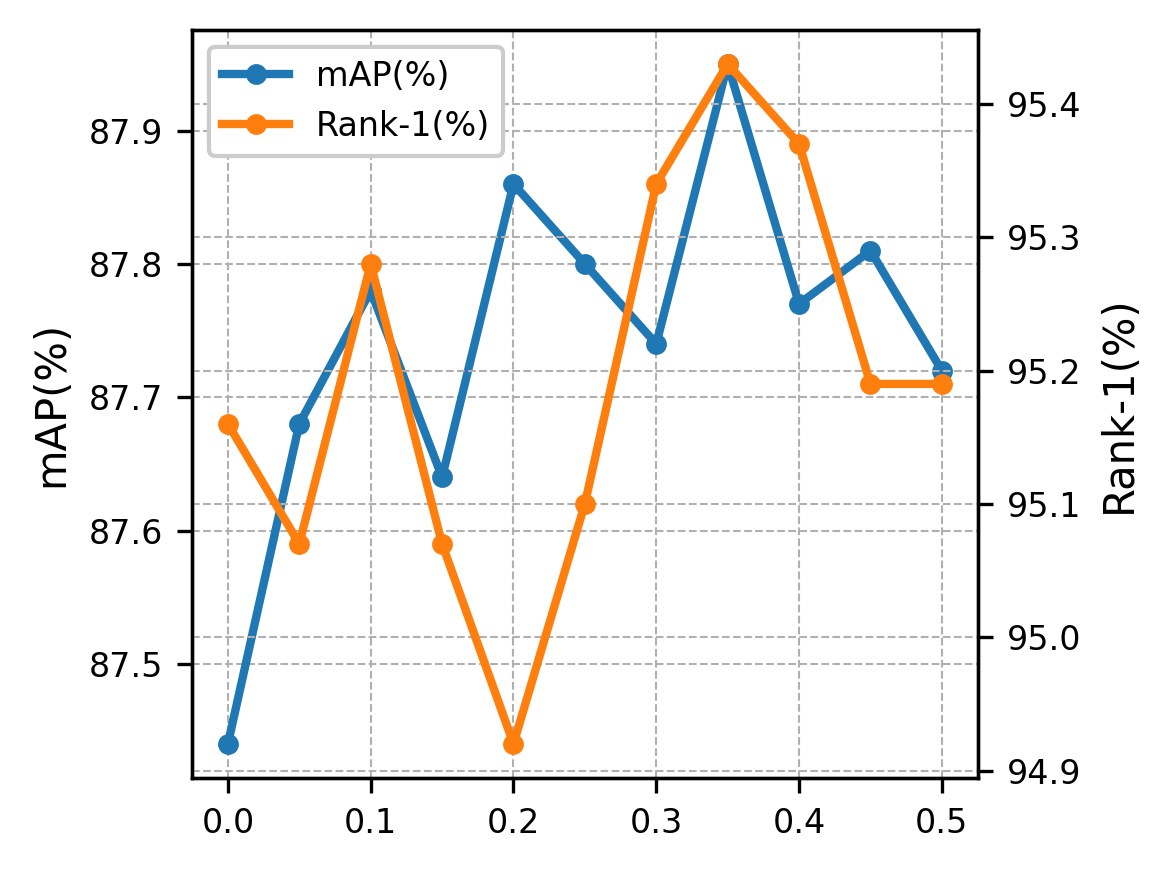

In [15]:
######################################################################
#
# Information
#
######################################################################
# Get recorder of model
ax1 = np.arange(11) * 0.05
data1_1 = [87.44, 87.68, 87.78, 87.64, 87.86, 87.8, 87.74, 87.95, 87.77, 87.81, 87.72]
data1_2 = [95.16, 95.07, 95.28, 95.07, 94.92, 95.1, 95.34, 95.43, 95.37, 95.19, 95.19]

# Plot results
num_lines = 1
num_rows = 1
fig, axs = plt.subplots(
    num_lines, num_rows, figsize=(4 * num_rows, 3 * num_lines), dpi=Latex_DPI
)

subfig = axs
line1 = subfig.plot(ax1, data1_1, linewidth=2, marker="o", markersize=4, label="mAP(%)")
subfig.set_ylabel('mAP(%)')
subfig_twinx=subfig.twinx() 
line2 = subfig_twinx.plot(ax1, data1_2, linewidth=2, color='#ff7f0e',marker="o", markersize=4, label="Rank-1(%)")
subfig_twinx.set_ylabel('Rank-1(%)')
ax_list=(line1[0], line2[0])
lables=[name.get_label() for name in ax_list]
subfig.legend(ax_list,lables)
leg = subfig_twinx.legend(ax_list,lables)
leg.get_frame().set_alpha(1)

plt.tight_layout()


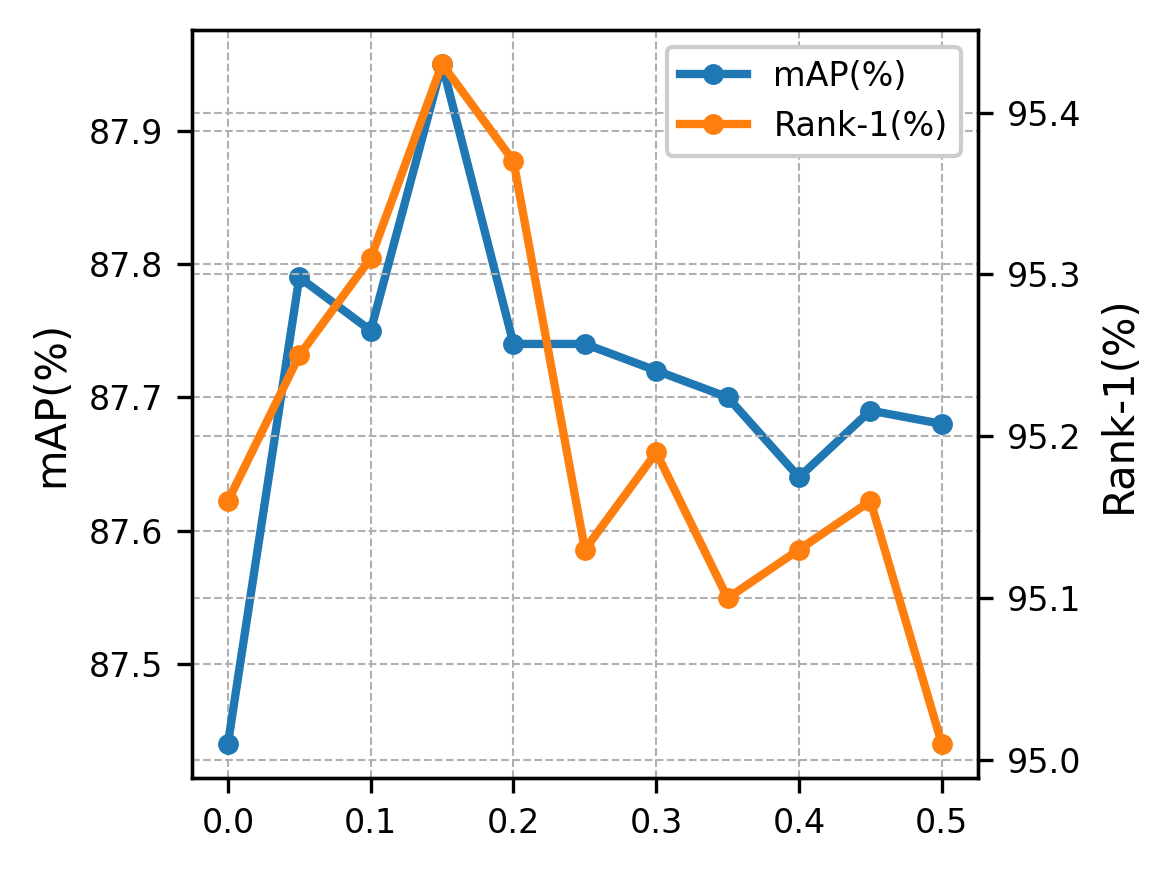

In [16]:
ax2 = np.arange(11) * 0.05
data2_1 = [87.44, 87.79, 87.75, 87.95, 87.74, 87.74, 87.72, 87.7, 87.64, 87.69, 87.68]
data2_2 = [95.16, 95.25, 95.31, 95.43, 95.37, 95.13, 95.19, 95.1, 95.13, 95.16, 95.01]

# Plot results
num_lines = 1
num_rows = 1
fig, axs = plt.subplots(
    num_lines, num_rows, figsize=(4 * num_rows, 3 * num_lines), dpi=Latex_DPI
)

subfig = axs
line1 = subfig.plot(ax2, data2_1, linewidth=2, marker="o", markersize=4, label="mAP(%)")
subfig.set_ylabel('mAP(%)')
subfig_twinx=subfig.twinx() 
line2 = subfig_twinx.plot(ax2, data2_2, linewidth=2, color='#ff7f0e',marker="o", markersize=4, label="Rank-1(%)")
subfig_twinx.set_ylabel('Rank-1(%)')
ax_list=(line1[0], line2[0])
lables=[name.get_label() for name in ax_list]
leg = subfig_twinx.legend(ax_list,lables)
leg.get_frame().set_alpha(1)

plt.tight_layout()
